In [93]:
import numpy as np
import matplotlib.pyplot as plt

n = 50               # Size of velocity field
num_particles = 1  # Number of particles
num_steps = 1000     # Number of time steps
dt = 0.01            # Time step size
velocity_field = np.empty((n, n), dtype=tuple)
velocity_field .fill((1, 0))

# Initialize positions randomly within a domain
particle_positions = np.random.rand(num_particles, 2)*(n-1)

# Initialize velocities as zeros
particle_velocities = np.zeros((num_particles, 2))

def get_fluid_velocity(pos, velfield):
    # Implement your fluid velocity calculation here
    # This function should return a 2D velocity vector based on the given position
    # The velocity field should be given as a mxm matrix of tuple entries representing the x and y velocities at that point.
    #if we don't do land on discrete points we estimate our velocity by looking at the nearest points. 
    #get decimal part of position
    if pos[0] % 1 or pos[1] % 1: 
        xdecimal = pos[0] % 1
        xint = int(pos[0])
        ydecimal = pos[1] % 1
        yint = int(pos[1])
        if xint<n-1 and yint<n-1:
            xvel = velfield[xint][yint][0]*(1-xdecimal)*(1-ydecimal) + velfield[xint+1][yint][0]*(xdecimal)*(1-ydecimal) + velfield[xint+1][yint+1][0]*(xdecimal)*(ydecimal) + velfield[xint][yint+1][0]*(ydecimal)*(1-xdecimal)
            yvel = velfield[xint][yint][1]*(1-xdecimal)*(1-ydecimal) + velfield[xint+1][yint][1]*(xdecimal)*(1-ydecimal) + velfield[xint+1][yint+1][1]*(xdecimal)*(ydecimal) + velfield[xint][yint+1][1]*(ydecimal)*(1-xdecimal)   
        else:
            xvel, yvel = 0, 0
    else:
        xvel, yvel = velfield[pos[0]][pos[1]][0], velfield[pos[0]][pos[1]][1]

    return (xvel, yvel) 

for step in range(num_steps):
    # Update particle positions
    particle_positions += particle_velocities * dt

    # Update particle velocities based on fluid velocity
    for i in range(num_particles):
        particle_velocities[i] = get_fluid_velocity(particle_positions[i], velocity_field)


array([10.64233224])

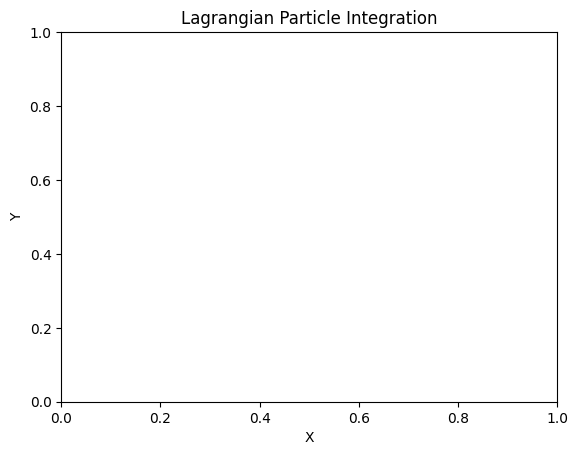

In [125]:
plt.xlim(0, 1)    
plt.ylim(0, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Lagrangian Particle Integration')
plt.scatter(particle_positions[:, 0], particle_positions[:, 1])
particle_positions[:, 0]
particle_positions[:, 1]

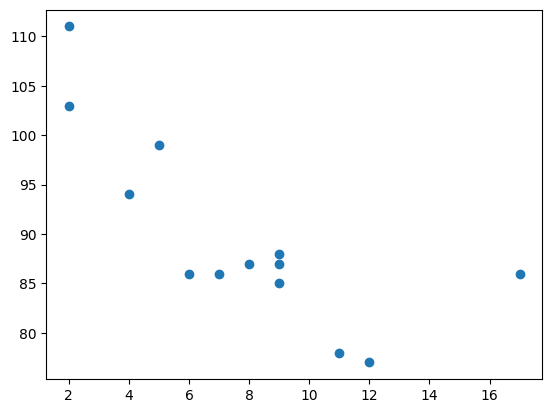

In [122]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([5,7,8,9,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])

plt.scatter(x, y)
plt.show()